In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [2]:
df = pd.read_parquet("df_cleaned_reg.parquet")

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df

,auction_house_name,auction_location,auction_name,auction_start_date,lot_num,bought_in,currency,artwork_creation_year,artwork_measurements_width,artwork_measurements_height,artwork_measurements_depth,artwork_measurements_unit,artwork_name,medium_final,price_estimate_min_usd,price_estimate_max_usd,artist_name,artist_nationality,artist_birth,price_estimate_mid_usd,auction_month,auction_year,hammer_price_usd,signed,has_provenance,exhibited,has_literature,price_estimate_min_usd_real,price_estimate_max_usd_real,price_estimate_mid_usd_real,hammer_price_usd_real,artist_continent,artist_genre,artist_gender,artist_dead,artist_death_date,artist_death_year
0,Sotheby's,New York,A Scholar Collects,2024-01-31,10,0,USD,1826,17.7,14.200,NaN,centimeters,Landscape of the Ardennes with the Church of M...,works on paper,12000,16000,Elisabeth-Louise Vigée Le Brun,french,1755,14000.0,1,2024,2.232967e+04,0,1,1,1,12514.00939,16685.345854,14599.677622,2.328614e+04,europe,Old Masters,Female,1,1842-03-30,1842
1,Sotheby's,New York,A Scholar Collects,2024-01-31,9,0,USD,1821,20.9,15.000,NaN,centimeters,Sky study,works on paper,12000,16000,Elisabeth-Louise Vigée Le Brun,french,1755,14000.0,1,2024,3.907692e+04,0,1,1,1,12514.00939,16685.345854,14599.677622,4.075075e+04,europe,Old Masters,Female,1,1842-03-30,1842
2,Sotheby's,New York,A Scholar Collects,2024-01-31,20,0,USD,<NA>,27.4,32.000,NaN,centimeters,"A young woman wearing pearl earrings, with flo...",works on paper,60000,80000,Rosalba Carriera,italian,1675,70000.0,1,2024,1.674725e+05,0,1,1,1,62570.046952,83426.729269,72998.38811,1.746461e+05,europe,Old Masters,Female,1,1757-04-15,1757
3,Sotheby's,New York,A Scholar Collects,2024-01-31,11,0,USD,<NA>,38.1,50.165,NaN,centimeters,Self-Portrait In Traveling Costume,works on paper,700000,1000000,Elisabeth-Louise Vigée Le Brun,french,1755,850000.0,1,2024,2.712088e+06,0,1,1,1,729983.881103,1042834.115862,886408.998483,2.828258e+06,europe,Old Masters,Female,1,1842-03-30,1842
4,Sotheby's,New York,A Scholar Collects,2024-01-31,8,0,USD,<NA>,28.2,43.200,NaN,centimeters,Profile Portrait of the Duchesse de Polignac,works on paper,120000,180000,Elisabeth-Louise Vigée Le Brun,french,1755,150000.0,1,2024,2.679560e+05,0,1,1,1,125140.093903,187710.140855,156425.117379,2.794337e+05,europe,Old Masters,Female,1,1842-03-30,1842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283071,Sotheby's,New York,American Art,2020-06-26,45,1,USD,2020,49.5,30.500,NaN,centimeters,SECONNET POINT FROM THE EAST END,paintings,60000,80000,Worthington Whittredge,american,1820,70000.0,6,2020,0.000000e+00,1,1,0,0,74856.054069,99808.072091,87332.06308,0.000000e+00,north america,Old Masters,Male,1,1910-02-25,1910
6283072,Sotheby's,New York,American Art,2020-06-26,48,0,USD,1850,76.8,51.400,NaN,centimeters,"SCHOONER ""LOO CHOO"" IN A STORMY SEA",paintings,80000,120000,Fitz Henry Lane,american,1804,100000.0,6,2020,8.241758e+04,1,1,0,0,99808.072091,149712.108137,124760.090114,1.028243e+05,north america,Old Masters,Male,1,1865-08-13,1865
6283073,Sotheby's,New York,American Art,2020-06-26,49,0,USD,1850,76.8,51.400,NaN,centimeters,"SCHOONER ""LOO CHOO"" IN A CALM SEA",paintings,60000,80000,Fitz Henry Lane,american,1804,70000.0,6,2020,2.747253e+05,1,1,0,0,74856.054069,99808.072091,87332.06308,3.427475e+05,north america,Old Masters,Male,1,1865-08-13,1865
6283074,Sotheby's,New York,American Art,2020-06-26,51,0,USD,1830,45.7,34.900,NaN,centimeters,"SOUTHERN SIERRA, MOUNT WHITNEY REGION",paintings,20000,30000,Albert Bierstadt,german,1830,25000.0,6,2020,1.868132e+04,1,1,0,0,24952.018023,37428.027034,31190.022529,2.330683e+04,europe,Impressionist and Modern,Male,1,1902-02-18,1902


# Summary statistics

In [5]:
print("fraction of lots bought in = ", df['bought_in'].mean())

fraction of lots bought in =  0.20998886532647384


In [7]:
# basic summary (all)
summary_rel = df[['hammer_price_usd_real',
                  'price_estimate_min_usd_real',
                  'price_estimate_max_usd_real',
                  'price_estimate_mid_usd_real']]

summary_rel.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

,hammer_price_usd_real,price_estimate_min_usd_real,price_estimate_max_usd_real,price_estimate_mid_usd_real
count,6.226543e+06,6226543.0,6226543.0,6226543.0
mean,4.522010e+04,31754.171723,44716.839538,38235.505631
std,7.055069e+05,418964.726752,589220.405315,502149.641342
min,-1.099304e+00,-1.000506,-1.000506,-1.000506
10%,0.000000e+00,0.0,0.0,0.0
25%,7.289227e+02,0.0,0.0,0.0
50%,3.272310e+03,2222.07792,3060.248142,2664.378361
75%,1.198565e+04,8870.043285,12026.743483,10428.553098
90%,4.405205e+04,31983.592094,44195.007449,38155.023372
99%,6.136984e+05,444763.28469,628342.458903,538125.913587


In [9]:
# summary (sold only)
cols = [
    "hammer_price_usd_real",
    "price_estimate_min_usd_real",
    "price_estimate_max_usd_real",
    "price_estimate_mid_usd_real",
]

summary_pos = df[cols].apply(lambda s: s[s > 0]).describe(
    percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
)

summary_pos

,hammer_price_usd_real,price_estimate_min_usd_real,price_estimate_max_usd_real,price_estimate_mid_usd_real
count,4.918558e+06,4550721.0,4550722.0,4550722.0
mean,5.724541e+04,43447.777984,61183.988875,52315.878656
std,7.933568e+05,489554.472264,688493.878103,586749.042659
min,8.958974e-01,1.036419,1.684797,1.003832
10%,1.033667e+03,836.290114,1126.101435,987.458939
25%,2.083486e+03,1669.59758,2291.956538,2011.368905
50%,5.481793e+03,4578.172499,6424.180815,5510.668439
75%,1.719514e+04,14066.014162,19377.155204,16781.020131
90%,5.914993e+04,46547.336408,65296.535691,55865.865672
99%,7.699563e+05,605630.729927,853789.737968,729389.738925


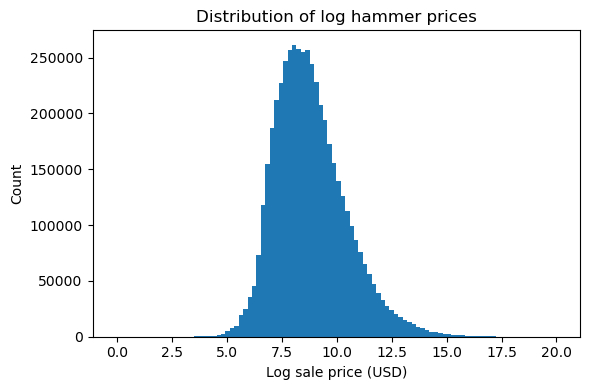

In [19]:
# distribution of prices

mask = df["hammer_price_usd_real"] > 0
log_prices = np.log(df.loc[mask, "hammer_price_usd_real"])

# plot (single axis)
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(log_prices, bins=100)
ax.set_xlabel("Log sale price (USD)")
ax.set_ylabel("Count")
ax.set_title("Distribution of log hammer prices")

plt.tight_layout()
plt.savefig("log_price_histogram.pdf", bbox_inches="tight")
plt.show()

In [14]:
# summary of variables
target_vars = [
    'auction_house_name',
    'auction_location',
    'medium_final',
    'artist_name'
]

for var in target_vars:
    print("\n" + "="*70)
    print(f"Top 5 categories for: {var}")
    
    # top 5 most frequent values
    top5 = df[var].value_counts().head(5).index
    
    # summary statistics for each
    summary = df[df[var].isin(top5)].groupby(var).agg(
        avg_sale_price = ('hammer_price_usd_real', 'mean'),
        avg_est_low = ('price_estimate_min_usd_real', 'mean'),
        avg_est_high = ('price_estimate_max_usd_real', 'mean'),
        count = (var, 'size')
    ).sort_values('count', ascending=False)
    
    print(summary)


Top 5 categories for: auction_house_name
                    avg_sale_price   avg_est_low   avg_est_high   count
auction_house_name                                                     
Christie's           131040.429290  86008.409328  123536.058215  805563
Sotheby's            144811.311074  99295.078415  140661.476232  726864
Bonhams               13052.103447  11041.798056    16097.89455  290363
Dorotheum             10333.870356   9959.696144   13394.540493  185319
Phillips              56988.161957  50152.102625   71956.136587  160118

Top 5 categories for: auction_location
                  avg_sale_price    avg_est_low   avg_est_high   count
auction_location                                                      
Paris               23284.041441   15202.826561   20799.040974  711406
New York           175187.262209  122186.562274   174003.76426  686923
London             118952.695894   81274.455882  116367.830279  619935
Vienna              13892.263224   13041.892018   19974.265

In [18]:
# yearly summary 
yearly = df.groupby('auction_year').agg(
    lots=('artwork_name', 'size'),
    avg_price=('hammer_price_usd_real', 'mean'),
    median_price=('hammer_price_usd_real', 'median'),
    bought_in_rate=('bought_in', 'mean')
)

print(yearly)

                lots      avg_price  median_price  bought_in_rate
auction_year                                                     
1986           77092   32474.633973   5821.317095        0.002465
1987           91714   47508.717552   7374.584732        0.001843
1988           97913   61681.218044   8868.796480        0.000664
1989          114654   91370.227458  10131.657934        0.004474
1990          106510   77081.984689  10118.626457        0.029424
1991           81290   34432.045379   7267.099748        0.012572
1992           82064   36833.297354   6803.488515        0.015573
1993           91030   30904.846306   5472.706864        0.006240
1994          107182   28198.876818   5085.457117        0.003564
1995          114172   32426.521673   5238.237288        0.002523
1996          120699   30507.168086   5398.529379        0.003438
1997          127585   37132.638585   5211.487183        0.014147
1998          151504   31769.335169   4419.782678        0.056764
1999      

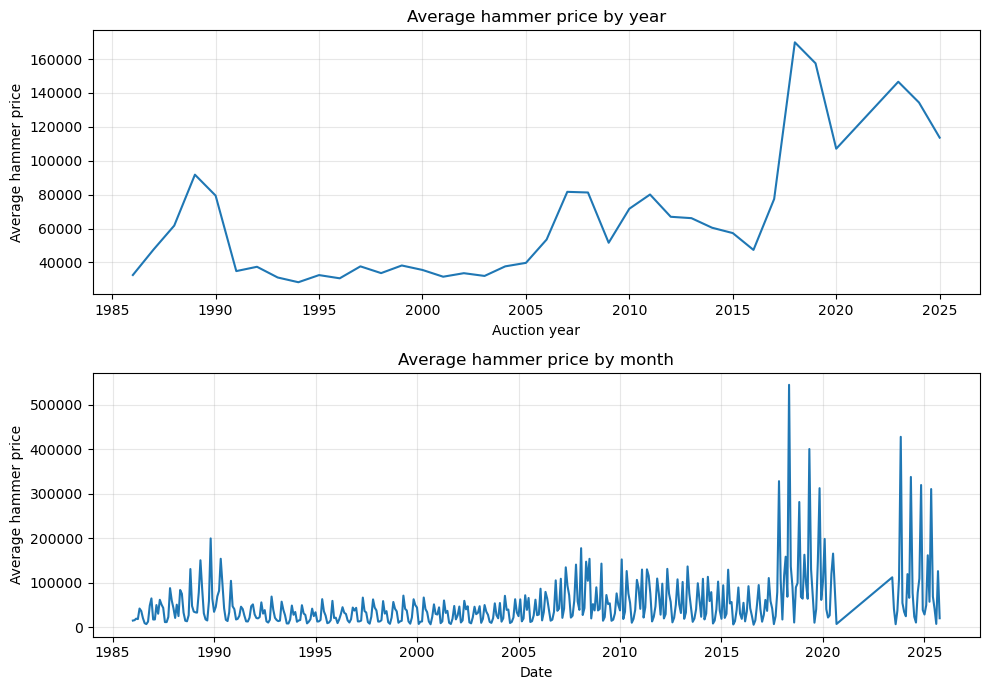

In [30]:
# average hammer price plots
valid = df["hammer_price_usd_real"] > 0

# yearly
yearly_rel = (
    df.loc[valid]
      .groupby("auction_year")["hammer_price_usd_real"]
      .mean()
      .reset_index(name="mean_hammer_price_usd_real")
)

# monthly
df["auction_month"] = df["auction_start_date"].dt.to_period("M")

monthly_rel = (
    df.loc[valid]
      .groupby("auction_month")["hammer_price_usd_real"]
      .mean()
      .reset_index(name="mean_hammer_price_usd_real")
)

monthly_rel["auction_month"] = monthly_rel["auction_month"].dt.to_timestamp()

# plot
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=False)

# top: yearly
axes[0].plot(yearly_rel["auction_year"], yearly_rel["mean_hammer_price_usd_real"])
axes[0].set_xlabel("Auction year")
axes[0].set_ylabel("Average hammer price")
axes[0].grid(True, alpha=0.3)
axes[0].set_title("Average hammer price by year")

# bottom: monthly
axes[1].plot(monthly_rel["auction_month"], monthly_rel["mean_hammer_price_usd_real"])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Average hammer price")
axes[1].grid(True, alpha=0.3)
axes[1].set_title("Average hammer price by month")

plt.tight_layout()
plt.savefig("price_yearly_and_monthly.pdf", bbox_inches="tight")
plt.show()